<a href="https://colab.research.google.com/github/riyash0109/MachineLearning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
import seaborn as sns;sns.set()

[[ 3.35320909e+00  1.69958043e+00]
 [ 1.36678633e+00  6.34971633e-01]
 [ 2.24592863e-01  4.77028154e+00]
 [ 4.43598630e-01  3.11530945e+00]
 [ 2.76808540e+00  1.08782923e+00]
 [ 1.25566754e+00  3.38204112e+00]
 [ 1.00372519e+00  4.19147702e+00]
 [ 3.20903274e+00  1.78597253e+00]
 [ 7.43873988e-01  4.12240568e+00]
 [ 1.57322172e+00  4.83933793e-01]
 [ 7.67522789e-01  4.39759671e+00]
 [ 1.83375842e+00  7.54036153e-01]
 [ 1.10123507e+00  4.88977075e+00]
 [ 4.31891060e-01  4.33495456e+00]
 [ 1.89446550e+00  1.37913750e+00]
 [ 3.48515439e+00  1.46435135e+00]
 [ 2.73124907e+00  2.49704755e-01]
 [ 5.72793810e-01  4.08805543e+00]
 [ 1.26572308e+00  6.20712897e-01]
 [ 1.59331788e+00  1.22121317e+00]
 [ 1.06923853e+00  4.53068484e+00]
 [ 7.89338559e-01  4.33748653e+00]
 [ 1.61152972e+00  1.82347242e+00]
 [ 2.77180174e-01  4.84428322e+00]
 [ 2.36923352e+00  7.94735861e-01]
 [ 9.14338767e-01  4.55014643e+00]
 [ 1.60841463e+00  4.01800537e-01]
 [ 9.82570091e-01  5.37530962e+00]
 [ 1.24258802e+00  4

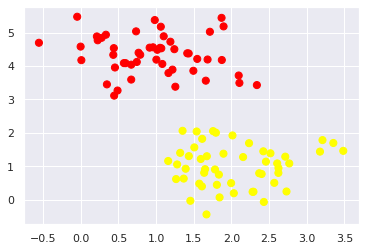

In [ ]:
from sklearn.datasets import make_blobs
X,y= make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.60)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="autumn");
print(X,y)

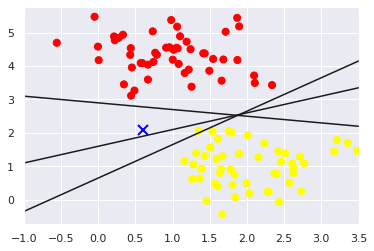

In [ ]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0], X[:, 1], c=y, s=50, cmap = 'autumn')
plt.plot([0.6],[2.1], 'x', color = 'blue', markeredgewidth=2, markersize = 10)

for m,b in [(1,0.65), (0.5,1.6), (-0.2, 2.9)]:
  plt.plot(xfit, m* xfit +b, '-k')

plt.xlim(-1,3.5);

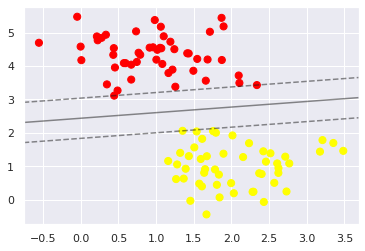

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear',C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

def plot_svc_decision_function(model, ax=None, plot_support=True):
  """Plot the decision function for a 2D SVC"""
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  #create grid to evaluate model
  x = np.linspace(xlim[0],xlim[1],30)
  y = np.linspace(ylim[0],ylim[1],30)
  Y, X = np.meshgrid(y,x)
  xy=np.vstack([X.ravel(), Y.ravel()]).T
  P= model.decision_function(xy).reshape(X.shape)

  #plot decision boundary and margins
  ax.contour(X,Y, P, colors= 'k',
             levels=[-1,0,1], alpha=0.5,
             linestyles=['--','-','--'])
  #plot support vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap = 'autumn')
plot_svc_decision_function(model);

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [1.35139348, 2.06383637]])

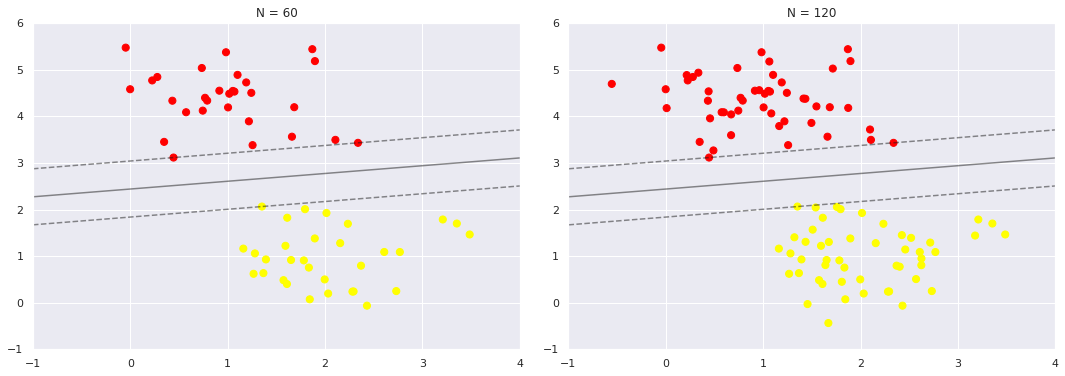

In [ ]:
def plot_svm(N=10,ax=None):
  X,y = make_blobs(n_samples=100,centers =2, random_state=0,cluster_std=0.60)
  X = X[:N]
  y = y[:N]
  model = SVC(kernel='linear',C=1E10)
  model.fit(X,y)

  ax = ax or plt.gca()
  ax.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
  ax.set_xlim(-1,4)
  ax.set_ylim(-1,6)
  plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60,120]):
  plot_svm(N,axi)
  axi.set_title('N = {0}'.format(N))

In [ ]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10,100], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 100), value=10), Output()), _dom_classes=('widget…

In [ ]:
reg = SVC(kernel='rbf',C=1E6)#Reglularization Parameter
reg.fit(X,y)

SVC(C=1000000.0)

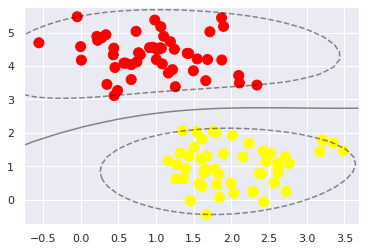

In [ ]:
plt.scatter(X[:,0],X[:,1], c=y, s= 100, cmap='autumn')
plot_svc_decision_function(reg)
plt.scatter(reg.support_vectors_[:,0],reg.support_vectors_[:,1],s=300, lw=1, facecolors='none');

Hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning. The prefix ‘hyper_’ suggests that they are ‘top-level’ parameters that control the learning process and the model parameters that result from it.

As a machine learning engineer designing a model, you choose and set hyperparameter values that your learning algorithm will use before the training of the model even begins. In this light, hyperparameters are said to be external to the model because the model cannot change its values during learning/training.

Hyperparameters are used by the learning algorithm when it is learning but they are not part of the resulting model. At the end of the learning process, we have the trained model parameters which effectively is what we refer to as the model. The hyperparameters that were used during training are not part of this model. We cannot for instance know what hyperparameter values were used to train a model from the model itself, we only know the model parameters that were learned.

Basically, anything in machine learning and deep learning that you decide their values or choose their configuration before training begins and whose values or configuration will remain the same when training ends is a hyperparameter.